<a href="https://colab.research.google.com/github/SIVAGORAM/DEEPLEARNING/blob/main/Online_retail_Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The shape of our dataset is: (541909, 8)
Number of transactions:  25900
Number of products:  4070
Number of customers: 4372
Percentage of customers NA:  24.93 %
Number of countries:  38
We have  9288  cancelled orders.
Percentage of orders canceled: 9288/25900 (35.86%) 


<ipython-input-1-68c5bfc830a3>:39: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(groupby_invoice['productsNumber'],ax=ax)


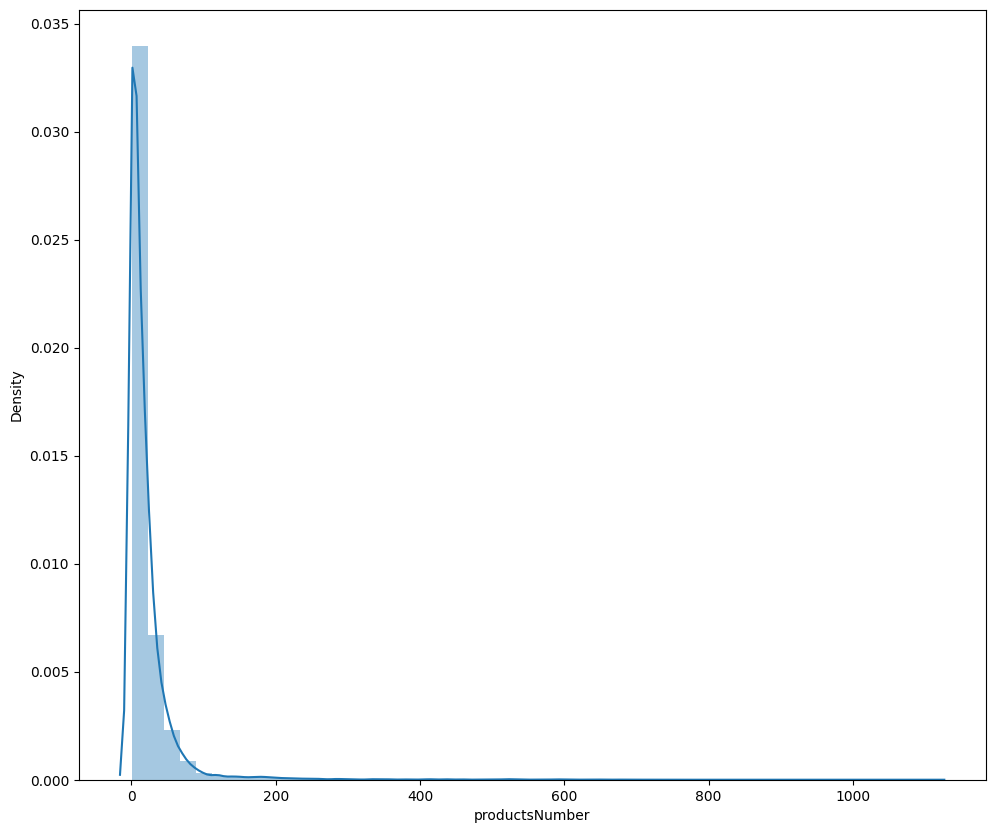

<ipython-input-1-68c5bfc830a3>:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")


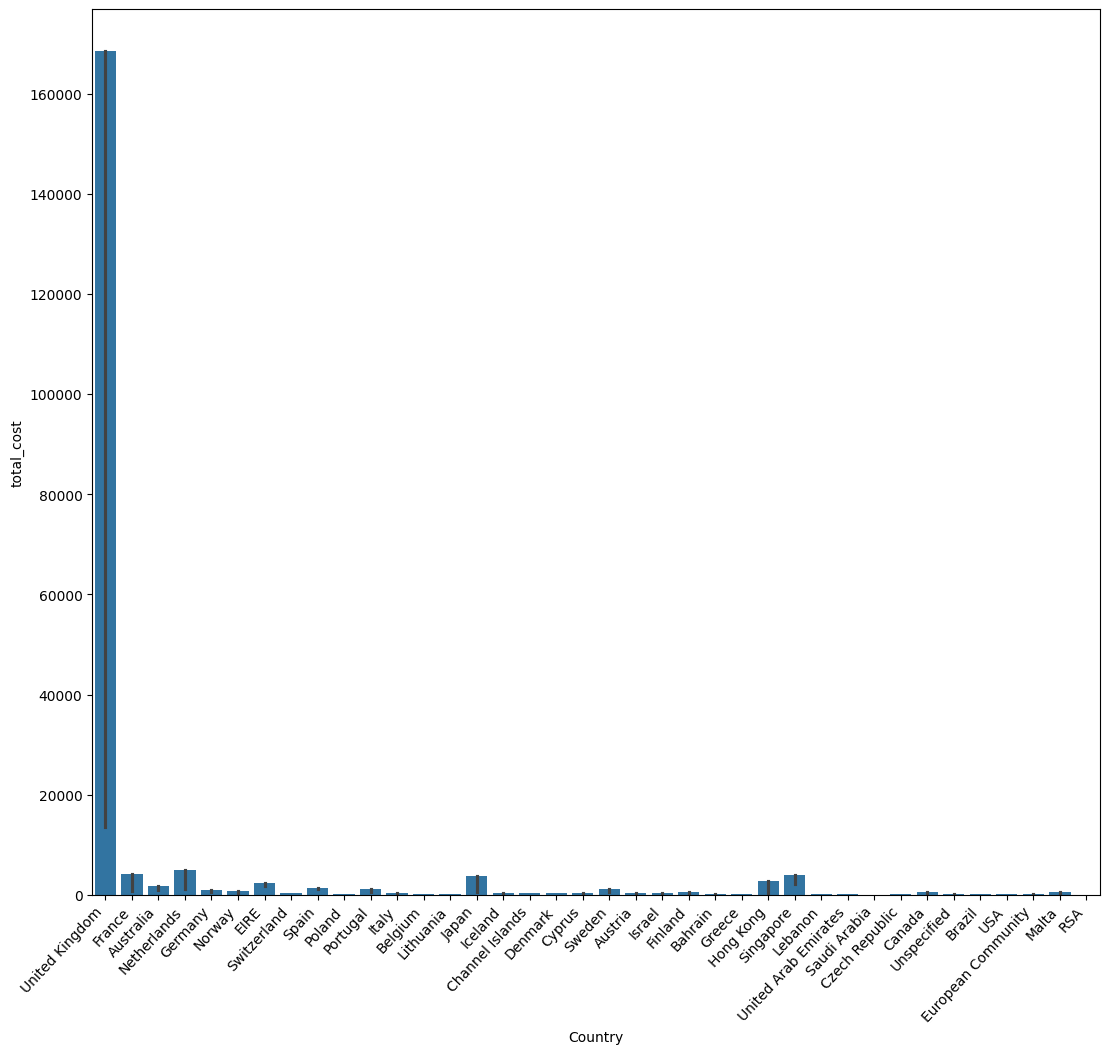

<ipython-input-1-68c5bfc830a3>:51: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  retail_df.groupby('Country').sum().sort_values(by='total_cost', ascending=False)


Number of transactions:  23494
Number of products bought:  4065
Number of customers: 3950
Percentage of customers NA:  26.96 %
Number of countries:  1


,InvoiceNo,Quantity
20090,581483,80995
2136,541431,74215
17136,574941,14149
17765,576365,13956
13770,567423,12572


In [ ]:
#EXP:-05
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
retail_df = pd.read_excel("/content/Online Retail.xlsx")
print("The shape of our dataset is:", retail_df.shape)
retail_df.head(10)
retail_df.tail(10)
print("Number of transactions: ", retail_df['InvoiceNo'].nunique())
print("Number of products: ",retail_df['StockCode'].nunique())
print("Number of customers:", retail_df['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(retail_df['CustomerID'].isnull().sum() *100 / len(retail_df),2),"%" )
print('Number of countries: ',retail_df['Country'].nunique())
retail_df.describe()
cancelled_orders = retail_df[retail_df['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders.head()
cancelled_orders[cancelled_orders['Quantity']==-80995]
cancelled_orders[cancelled_orders['Quantity']>0]
print("We have ",len(cancelled_orders), " cancelled orders.")
total_orders = retail_df['InvoiceNo'].nunique()
cancelled_number = len(cancelled_orders)
print('Percentage of orders canceled: {}/{} ({:.2f}%) '.format(cancelled_number,total_orders, cancelled_number/total_orders*100))
groupby_customers = pd.DataFrame(retail_df.groupby('CustomerID')['InvoiceNo'].nunique())
groupby_customers.head()
groupby_customers.describe()
groupby_invoice = pd.DataFrame(retail_df.groupby('InvoiceNo')['StockCode'].nunique())
groupby_invoice.columns=['productsNumber']
groupby_invoice.head()
groupby_invoice.describe()
retail_df.groupby(['InvoiceNo','CustomerID'])['StockCode'].nunique().describe()
temp_df=retail_df.groupby(['InvoiceNo','CustomerID'],as_index=False)['InvoiceDate'].count()
transaction_df = temp_df.rename(columns = {'InvoiceDate':'Number of products'})
transaction_df.head()
transaction_df.describe()
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 10)
sns.distplot(groupby_invoice['productsNumber'],ax=ax)
plt.show()
retail_df['total_cost'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df.head()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax=sns.barplot(x='Country', y='total_cost',data=retail_df,estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()
retail_df.groupby('Country').sum().sort_values(by='total_cost', ascending=False)
retail_df[retail_df['Country']=='United Kingdom']['CustomerID'].nunique()
retail_uk = retail_df[retail_df['Country']=='United Kingdom']
retail_uk.describe()
print("Number of transactions: ", retail_uk['InvoiceNo'].nunique())
print("Number of products bought: ",retail_uk['StockCode'].nunique())
print("Number of customers:", retail_uk['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(retail_uk['CustomerID'].isnull().sum() *100 / len(retail_uk),2),"%" )
print('Number of countries: ',retail_uk['Country'].nunique())
groupedProduct = retail_uk.groupby('StockCode',as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
groupedProduct.head(10)
invoice_quantity= retail_uk.groupby('InvoiceNo',as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
invoice_quantity.head()
